In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data_theorteical=pd.read_csv("C:\\Workplace\\Python\\AnalysisForThePaper\\NEH\\Final\\C# simulation data gen\\ConsoleApp2\\bin\\Debug\\0_035.csv")
data_theorteical=data_theorteical.dropna().iloc[:100,:].reset_index(drop=True)
print(data_theorteical.shape)

(100, 17)


In [3]:
data_withnoise=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\0_035_with_noise.csv")
print(data_withnoise.shape)
# data_withnoise.head()
len(data_withnoise.Peptide.unique())

(20000, 24)


100

In [4]:
neh_vals=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\neh_ape_mpe_res.csv")
neh_vals.columns=[x.replace('DataRecord.','') for x in neh_vals.columns]
neh_vals.Protein=[x.replace('"',"") for x in neh_vals.Protein]
neh_vals.Peptide=[x.replace('"',"") for x in neh_vals.Peptide]
# neh_vals.head()
print(neh_vals.shape)

(20000, 34)


In [5]:
data=pd.concat([data_withnoise[['Protein', 'Peptide', 'Charge', 'NEH','I0', 'I1', 'I2','I3', 'I4', 'I5', 'SNR']],
                neh_vals[['NEH_sim', 'NEH_APE', 'APE_rmse']] ],axis=1) 
# data.head(50)

In [6]:

merged=pd.merge(data_theorteical,data,on=['Protein', 'Peptide', 'Charge', 'NEH'])
print(merged.shape)
merged[['Peptide', 'Charge', 'NEH',  
        'I0_x', 'I1_x', 'I2_x', 'I3_x', 'I4_x', 'I5_x', 
       'I0_y', 'I1_y', 'I2_y', 'I3_y', 'I4_y', 'I5_y',
       'SNR']].tail(5)
merged["rss"]= (merged.I0_x - merged.I0_y)**2 + (merged.I1_x - merged.I1_y)**2+ (merged.I2_x - merged.I2_y)**2+(merged.I3_x - merged.I3_y)**2+(merged.I4_x - merged.I4_y)**2+(merged.I5_x - merged.I5_y)**2
merged['RD_neh_ape']=abs(merged.NEH-merged.NEH_APE)/merged.NEH
merged=merged[['Protein', 'Peptide', 'Charge', 'NEH', 'SNR', 'NEH_sim', 'NEH_APE', 'rss','RD_neh_ape','APE_rmse']]
merged=merged.groupby(by=['Protein', 'Peptide', 'Charge', 'NEH', 'SNR']).median()
merged=merged.reset_index()
# min_val=min([x for x in merged.RD_neh_ape if x >  1E-10])
# merged.RD_neh_ape=[x if x > 1E-10 else min_val for x in merged.RD_neh_ape]
print(merged.shape)

(20000, 27)
(2000, 10)


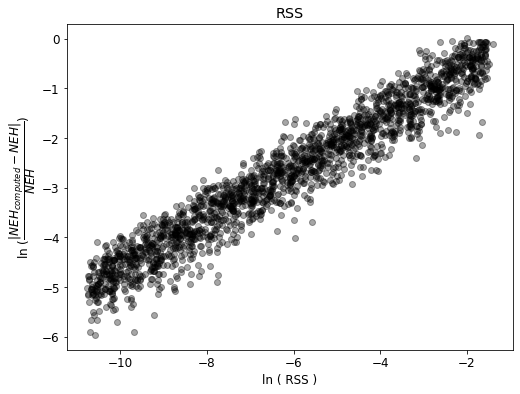

In [7]:

from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(8,6))
plt.rc('font', size=12)
# ynew= lowess([math.log(x) for x in merged.rss],[math.log(x) for x in merged.RD_neh_ape],frac=1/3)
# plt.plot(ynew[:,1],ynew[:,0],c='r',linewidth=2,alpha=0.99,ls='-.')

plt.scatter([math.log(x) for x in merged.rss],[math.log(x) for x in merged.RD_neh_ape],alpha=0.35,c='k')
plt.xlabel(r'ln ( RSS )')
plt.ylabel(r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.title('RSS')
plt.savefig("ape_rss.jpeg",dpi=900)

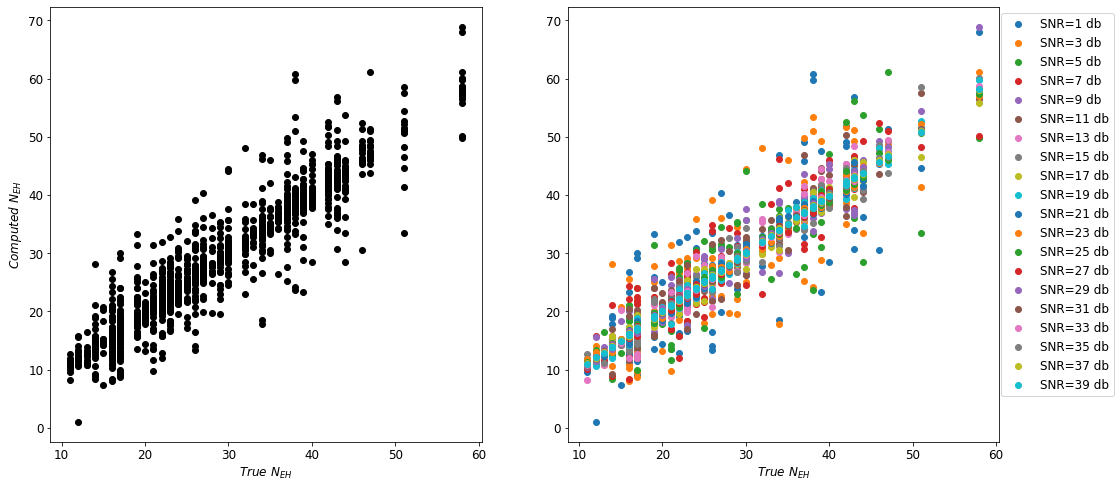

In [8]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.scatter(merged.NEH,merged.NEH_APE,c='k')#c=merged.SNR
plt.xlabel(r'$True \ N_{EH}$')
plt.ylabel(r'$Computed \ N_{EH}$')
plt.subplot(1,2,2)
snrs=list(merged.SNR.unique())
for i in range(0,len(snrs),1):
    temp=merged[merged.SNR==snrs[i]]
    plt.scatter(temp.NEH,temp.NEH_APE,label=f'SNR={snrs[i]} db')
    # plt.show()
plt.legend(loc='best', bbox_to_anchor=(0.78, 0., 0.5, 1))
plt.xlabel(r'$True \ N_{EH}$')

plt.savefig("test.jpeg")

In [9]:
# import seaborn as sns
# rss_ape=(merged.APE_rmse**2)*6
# rss_mpe=(merged.MPE_rmse**2)*6

# plt.figure(figsize=(7,5))
# sns.kdeplot(rss_ape,label='MRIA',bw_adjust=0.3)
# sns.kdeplot(rss_mpe,label='MPE',bw_adjust=0.3)
# plt.hlines(y=-0.5,xmax=1.2,xmin=-0.05,colors='k',alpha=0.5)
# plt.box()
# plt.legend()
# plt.xlabel('RSS')

Text(0.5, 1.0, 'RSS')

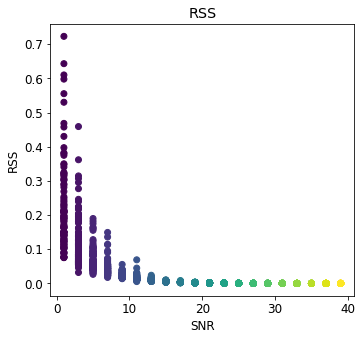

In [10]:
rss_ape=(merged.APE_rmse**2)*6
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(merged.SNR,rss_ape,c=merged.SNR)
plt.xlabel('SNR')
plt.ylabel('RSS')
plt.title('RSS')
# plt.subplot(1,2,2)
# plt.scatter(merged.SNR,rss_mpe,c=merged.SNR)
# plt.xlabel('SNR')
# plt.ylabel('RSS')
# plt.title('MPE')

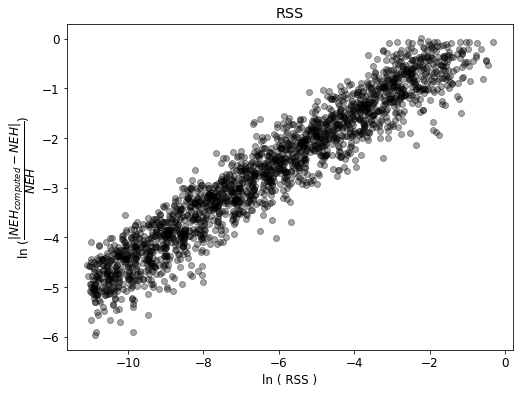

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(8,6))
plt.rc('font', size=12)
# ynew= lowess([math.log(x) for x in merged.rss],[math.log(x) for x in merged.RD_neh_ape],frac=1/3)
# plt.plot(ynew[:,1],ynew[:,0],c='r',linewidth=2,alpha=0.99,ls='-.')

plt.scatter([math.log(x) for x in rss_ape],[math.log(x) for x in merged.RD_neh_ape],alpha=0.35,c='k')
plt.xlabel(r'ln ( RSS )')
plt.ylabel(r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.title('RSS')
plt.savefig("ape_rss_2.jpeg",dpi=900)

(11260, 21)


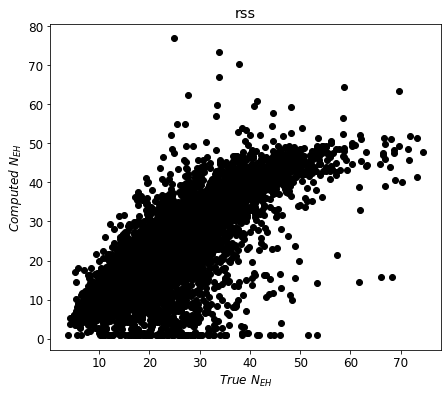

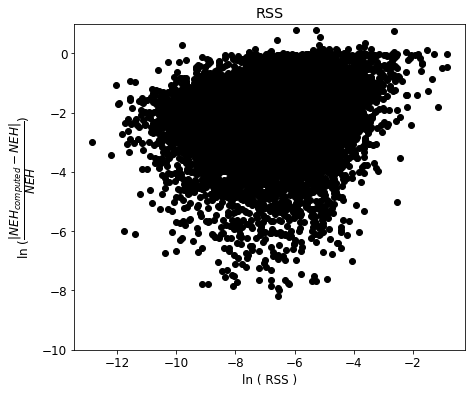

In [115]:
# exp_data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\Experimental_result\liverpool_liver\Estimated_neh_numbers_liverpool_liver_.csv")
exp_data=pd.read_csv(r"C:\Workplace\C++\professorGIThub\d2ome_source_code\d2ome_source_code\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_neh_numbers_liverpool_liver_.csv")

ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
def get_comm_neh(pep):
    return sum([ck[aa] for aa in pep.upper()])
exp_data.T_NEH=[get_comm_neh(pep) for pep in exp_data.Peptide]

# exp_data=exp_data.dropna()
# exp_data=exp_data[exp_data.APE_RMSE<0.01]
print(exp_data.shape) 


plt.figure(figsize=(7,6))
plt.title('rss')
plt.scatter(exp_data.T_NEH,exp_data.APE_NEH,c='k')
plt.xlabel(r'$True \ N_{EH}$')
plt.ylabel(r'$Computed \ N_{EH}$')
plt.savefig("1.jpeg")
plt.show()

plt.figure(figsize=(7,6))
plt.title('rss')
rd=[math.log(x) for x in abs(exp_data.APE_NEH.astype('float')-exp_data.T_NEH)/exp_data.T_NEH]
rss=[math.log(x) for x in (exp_data.APE_RMSE.astype('float')**2)*6]
exp_data['rd']=rd
exp_data['rss']=rss
plt.scatter(rss,rd,c='k') 
plt.ylim([-10,1.5])
plt.ylim([-10,1])
plt.xlabel(r'ln ( RSS )')
plt.ylabel(r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.title('RSS')
plt.savefig("2.jpeg")


<Figure size 504x432 with 0 Axes>

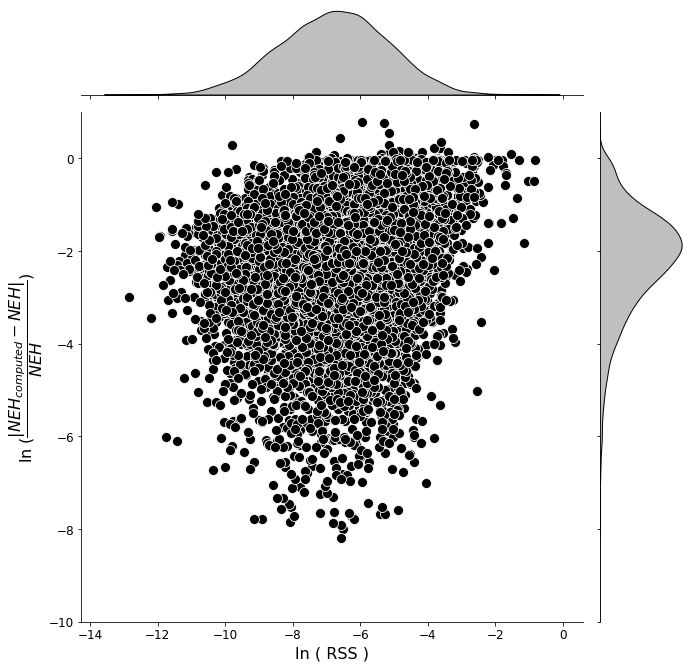

In [116]:
plt.figure(figsize=(7,6))

# ax=sns.jointplot(data=exp_data, x="rss", y="rd",color='k') 
ax = sns.JointGrid(data=exp_data, x="rss", y="rd")
ax.plot_joint(sns.scatterplot, s=100, color='k')
ax.plot_marginals(sns.kdeplot, color='k', fill=True)

ax.fig.set_size_inches((10,10))
plt.ylim([-10,1])
ax.set_axis_labels(r'ln ( RSS )', 
                   r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)', fontsize=16)

plt.savefig("2_APE.jpeg",dpi=900)
plt.show()

(10907, 21)


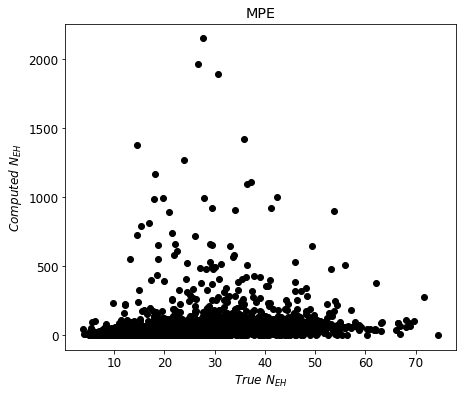

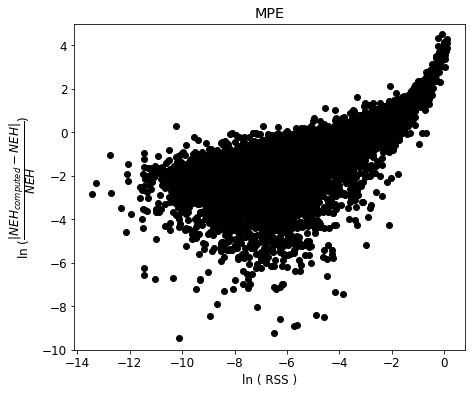

In [117]:
# exp_data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\Experimental_result\liverpool_liver\Estimated_neh_numbers_liverpool_liver_.csv")
exp_data=pd.read_csv(r"C:\Workplace\C++\professorGIThub\d2ome_source_code\d2ome_source_code\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_neh_numbers_liverpool_liver_.csv")

ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
def get_comm_neh(pep):
    return sum([ck[aa] for aa in pep.upper()])
exp_data.T_NEH=[get_comm_neh(pep) for pep in exp_data.Peptide]

exp_data=exp_data.dropna() 
print(exp_data.shape) 

plt.figure(figsize=(7,6))
plt.title('MPE')
plt.scatter(exp_data.T_NEH,exp_data.MPE_NEH.astype('float'),c='k')
plt.xlabel(r'$True \ N_{EH}$')
plt.ylabel(r'$Computed \ N_{EH}$')
# plt.ylim([0,500])
plt.savefig("3.jpeg")
plt.show()

plt.figure(figsize=(7,6))
plt.title('MPE')
rd=[math.log(x) for x in abs(exp_data.MPE_NEH.astype('float')-exp_data.T_NEH)/exp_data.T_NEH]
rss=[math.log(x) for x in (exp_data.MPE_RMSE.astype('float')**2)*6]
exp_data['rd']=rd
exp_data['rss']=rss
plt.scatter(rss,rd,c='k') 
plt.ylim([-10,5])
plt.xlabel(r'ln ( RSS )')
plt.ylabel(r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.title('MPE')
plt.savefig("4.jpeg")

In [118]:
plt.figure(figsize=(7,6))

# ax=sns.jointplot(data=exp_data, x="rss", y="rd",color='k',marginal_kws=dict(bins=55)) 
ax = sns.JointGrid(data=exp_data, x="rss", y="rd")
ax.plot_joint(sns.scatterplot, s=100, color='k')
ax.plot_marginals(sns.kdeplot, color='k', fill=True)

ax.fig.set_size_inches((10, 10))
plt.ylim([-10,5])
ax.set_axis_labels(r'ln ( RSS )', 
                   r'ln ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)', fontsize=16)

plt.savefig("4_MPE.jpeg",dpi=900)
plt.show()

1
2
3
4
5
6


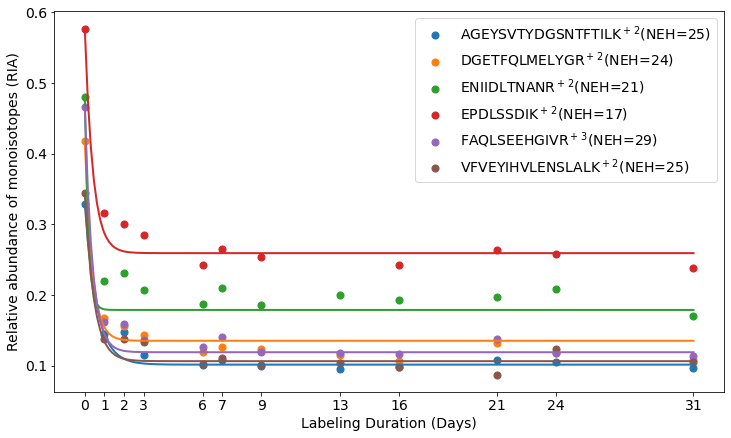

In [ ]:
plt.figure(figsize=(12,7))
plt.rc('font',size=14)
colors=['#4285F4','#EA4335','#FBBC04','#34A853','#202124','m']
neh=[25,24,21,17,29,25] 
for i in range(1,7):
    print(i)
    # if i ==1: continue
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
    plt.scatter(data['RIA.Time'],data['RIA.RIA_value'],s=50,label=f"{data['RIA.PeptideSeq'][0]}$^+$$^{data['RIA.Charge'][0]}$(NEH={neh[i-1]})")
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}_t.csv") 
    plt.plot(data['TheoreticalI0Value.time'],data['TheoreticalI0Value.value'],lw=2)
    
    
data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
plt.xticks(data['RIA.Time'])
plt.legend()
plt.xlabel('Labeling Duration (Days)')
plt.ylabel('Relative abundance of monoisotopes (RIA)')
plt.savefig("plot.jpeg",dpi=900)